# The Battle of Neighbourhoods: Opening a Middle Eastern Restaurant in Toronto, CA.

### 1. Introduction

The objective of this project is to determine which neighborhood in Toronto would be a good option for opening a Middle Eastern restaurant. The data utilized in this study include:
- A list of Toronto’s boroughs, neighborhoods, and postal codes on Wikipedia under: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M
- A list of geographical location data, including postal codes as well as latitude and longitude coordinates,  found under: https://cocl.us/Geospatial_data. 
- A list of venue data (a maximum of 500 venues and a radius of 1Km from each borough/ neighborhood latitude and longitude values), including the most common venues of a given borough in Toronto, via Foursquare.

### 2. Data Overview and Methodology

First, the required libraries are imported.

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

# library for tranforming a json file into a pandas dataframe
from pandas import json_normalize

# library for web scrapping 
!pip install beautifulsoup4
!pip install lxml
from bs4 import BeautifulSoup

# module to convert an address into its latitude and longitude values
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim 

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 

from IPython.display import display_html

# library for plotting maps
!conda install -c conda-forge folium=0.5.0 --yes
import folium 

import matplotlib.cm as cm
import matplotlib.colors as colors

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.cluster import KMeans


print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


Second, data from the different sources is retrieved, preprocessed, and explored. 

In [2]:
# BeautifulSoup library is used to scrap the following Wikipedia page: 
# (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)

data_source = requests.get('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M').text
soup=BeautifulSoup(data_source,'lxml')

# print Wikipedia page title to check whether or not it was scrapped successfully.
print(soup.title)

# print the table.
from IPython.display import display_html
the_table = str(soup.table)
display_html(the_table,raw=True)

<title>List of postal codes of Canada: M - Wikipedia</title>


Postal Code
 
 Borough
 
 Neighbourhood
 
 
 M1A
 
 Not assigned
 
 Not assigned
 
 
 M2A
 
 Not assigned
 
 Not assigned
 
 
 M3A
 
 North York
 
 Parkwoods
 
 
 M4A
 
 North York
 
 Victoria Village
 
 
 M5A
 
 Downtown Toronto
 
 Regent Park, Harbourfront
 
 
 M6A
 
 North York
 
 Lawrence Manor, Lawrence Heights
 
 
 M7A
 
 Downtown Toronto
 
 Queen's Park, Ontario Provincial Government
 
 
 M8A
 
 Not assigned
 
 Not assigned
 
 
 M9A
 
 Etobicoke
 
 Islington Avenue, Humber Valley Village
 
 
 M1B
 
 Scarborough
 
 Malvern, Rouge
 
 
 M2B
 
 Not assigned
 
 Not assigned
 
 
 M3B
 
 North York
 
 Don Mills
 
 
 M4B
 
 East York
 
 Parkview Hill, Woodbine Gardens
 
 
 M5B
 
 Downtown Toronto
 
 Garden District, Ryerson
 
 
 M6B
 
 North York
 
 Glencairn
 
 
 M7B
 
 Not assigned
 
 Not assigned
 
 
 M8B
 
 Not assigned
 
 Not assigned
 
 
 M9B
 
 Etobicoke
 
 West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
 
 
 M1C
 
 Scarborough
 
 Rouge Hill, Port Union, Highland Creek
 
 
 M2C
 
 Not assigned
 
 Not assigned
 
 
 M3C
 
 North York
 
 Don Mills
 
 
 M4C
 
 East York
 
 Woodbine Heights
 
 
 M5C
 
 Downtown Toronto
 
 St. James Town
 
 
 M6C
 
 York
 
 Humewood-Cedarvale
 
 
 M7C
 
 Not assigned
 
 Not assigned
 
 
 M8C
 
 Not assigned
 
 Not assigned
 
 
 M9C
 
 Etobicoke
 
 Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
 
 
 M1E
 
 Scarborough
 
 Guildwood, Morningside, West Hill
 
 
 M2E
 
 Not assigned
 
 Not assigned
 
 
 M3E
 
 Not assigned
 
 Not assigned
 
 
 M4E
 
 East Toronto
 
 The Beaches
 
 
 M5E
 
 Downtown Toronto
 
 Berczy Park
 
 
 M6E
 
 York
 
 Caledonia-Fairbanks
 
 
 M7E
 
 Not assigned
 
 Not assigned
 
 
 M8E
 
 Not assigned
 
 Not assigned
 
 
 M9E
 
 Not assigned
 
 Not assigned
 
 
 M1G
 
 Scarborough
 
 Woburn
 
 
 M2G
 
 Not assigned
 
 Not assigned
 
 
 M3G
 
 Not assigned
 
 Not assigned
 
 
 M4G
 
 East York
 
 Leaside
 
 
 M5G
 
 Downtown Toronto
 
 Central Bay Street
 
 
 M6G
 
 Downtown Toronto
 
 Christie
 
 
 M7G
 
 Not assigned
 
 Not assigned
 
 
 M8G
 
 Not assigned
 
 Not assigned
 
 
 M9G
 
 Not assigned
 
 Not assigned
 
 
 M1H
 
 Scarborough
 
 Cedarbrae
 
 
 M2H
 
 North York
 
 Hillcrest Village
 
 
 M3H
 
 North York
 
 Bathurst Manor, Wilson Heights, Downsview North
 
 
 M4H
 
 East York
 
 Thorncliffe Park
 
 
 M5H
 
 Downtown Toronto
 
 Richmond, Adelaide, King
 
 
 M6H
 
 West Toronto
 
 Dufferin, Dovercourt Village
 
 
 M7H
 
 Not assigned
 
 Not assigned
 
 
 M8H
 
 Not assigned
 
 Not assigned
 
 
 M9H
 
 Not assigned
 
 Not assigned
 
 
 M1J
 
 Scarborough
 
 Scarborough Village
 
 
 M2J
 
 North York
 
 Fairview, Henry Farm, Oriole
 
 
 M3J
 
 North York
 
 Northwood Park, York University
 
 
 M4J
 
 East York
 
 East Toronto, Broadview North (Old East York)
 
 
 M5J
 
 Downtown Toronto
 
 Harbourfront East, Union Station, Toronto Islands
 
 
 M6J
 
 West Toronto
 
 Little Portugal, Trinity
 
 
 M7J
 
 Not assigned
 
 Not assigned
 
 
 M8J
 
 Not assigned
 
 Not assigned
 
 
 M9J
 
 Not assigned
 
 Not assigned
 
 
 M1K
 
 Scarborough
 
 Kennedy Park, Ionview, East Birchmount Park
 
 
 M2K
 
 North York
 
 Bayview Village
 
 
 M3K
 
 North York
 
 Downsview
 
 
 M4K
 
 East Toronto
 
 The Danforth West, Riverdale
 
 
 M5K
 
 Downtown Toronto
 
 Toronto Dominion Centre, Design Exchange
 
 
 M6K
 
 West Toronto
 
 Brockton, Parkdale Village, Exhibition Place
 
 
 M7K
 
 Not assigned
 
 Not assigned
 
 
 M8K
 
 Not assigned
 
 Not assigned
 
 
 M9K
 
 Not assigned
 
 Not assigned
 
 
 M1L
 
 Scarborough
 
 Golden Mile, Clairlea, Oakridge
 
 
 M2L
 
 North York
 
 York Mills, Silver Hills
 
 
 M3L
 
 North York
 
 Downsview
 
 
 M4L
 
 East Toronto
 
 India Bazaar, The Beaches West
 
 
 M5L
 
 Downtown Toronto
 
 Commerce Court, Victoria Hotel
 
 
 M6L
 
 North York
 
 North Park, Maple Leaf Park, Upwood Park
 
 
 M7L
 
 Not assigned
 
 Not assigned
 
 
 M8L
 
 Not assigned
 
 Not assigned
 
 
 M9L
 
 North York
 
 Humber Summit
 
 


In [3]:
# The html table is converted into a Pandas DataFrame for cleaning and preprocessing.

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

dfscrap = pd.read_html(the_table)
df_wiki=dfscrap[0]
df_wiki.head()

Postal Code           Borough              Neighbourhood
0         M1A      Not assigned               Not assigned
1         M2A      Not assigned               Not assigned
2         M3A        North York                  Parkwoods
3         M4A        North York           Victoria Village
4         M5A  Downtown Toronto  Regent Park, Harbourfront

In [4]:
# The rows where Borough is 'Not assigned' are dropped.

df_wiki['Borough'].replace('Not assigned',np.nan, inplace=True)
df_wiki=df_wiki.dropna(subset=['Borough'], axis=0)

# Neighbourhoods with same Postal Code are combined.

df_wiki=df_wiki.groupby(['Postal Code', 'Borough'], sort=False).agg(','.join)
df_wiki.reset_index(inplace=True)

# The name of the neighbourhoods which are 'Not assigned' are replaced with the names of their Borough.
df_wiki['Neighbourhood'] = np.where(df_wiki['Neighbourhood'] == 'Not assigned',df_wiki['Borough'], df_wiki['Neighbourhood'])


df_wiki.head()

Postal Code           Borough                                Neighbourhood
0         M3A        North York                                    Parkwoods
1         M4A        North York                             Victoria Village
2         M5A  Downtown Toronto                    Regent Park, Harbourfront
3         M6A        North York             Lawrence Manor, Lawrence Heights
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [5]:
df_wiki.shape

(103, 3)

In [6]:
# the second source of data is a .CSV file which conatins the latitudes and longitudes for various neighbourhoods in Canada.
# the file is read from the following link: (https://cocl.us/Geospatial_data)

df_lat_lon = pd.read_csv('https://cocl.us/Geospatial_data')
df_lat_lon.head()

Postal Code   Latitude  Longitude
0         M1B  43.806686 -79.194353
1         M1C  43.784535 -79.160497
2         M1E  43.763573 -79.188711
3         M1G  43.770992 -79.216917
4         M1H  43.773136 -79.239476

In [7]:
# These 2 data frames are now merged together to a new data frame.

df_wiki_lat_lon = pd.merge(df_wiki,df_lat_lon,on='Postal Code')
df_wiki_lat_lon.head()


Postal Code           Borough                                Neighbourhood  \
0         M3A        North York                                    Parkwoods   
1         M4A        North York                             Victoria Village   
2         M5A  Downtown Toronto                    Regent Park, Harbourfront   
3         M6A        North York             Lawrence Manor, Lawrence Heights   
4         M7A  Downtown Toronto  Queen's Park, Ontario Provincial Government   

    Latitude  Longitude  
0  43.753259 -79.329656  
1  43.725882 -79.315572  
2  43.654260 -79.360636  
3  43.718518 -79.464763  
4  43.662301 -79.389494

In [8]:
# Obtaining the coordinates of Toronto from the dataset itself by averaging the Latitude/Longitude values.

latitude_toronto = df_wiki_lat_lon['Latitude'].mean()
longitude_toronto = df_wiki_lat_lon['Longitude'].mean()

print('The geographical coordinates of Toronto are {}, {}'.format(latitude_toronto, longitude_toronto))

The geographical coordinates of Toronto are 43.704607733980595, -79.3971529116505


In [9]:
# before retrieving the venue data, the boroughs that we have are visualized.

# a list with the Boroughs is created 

boroughs = df_wiki_lat_lon['Borough'].unique().tolist()

# each borough is categorized with a random color.

borough_color = {}
for borough in boroughs:
    borough_color[borough]= '#%02X%02X%02X' % tuple(np.random.choice(range(256), size=3)) 
    
# markers are added to the map

map_toronto = folium.Map(location=[latitude_toronto,longitude_toronto],zoom_start=10.3)

for lat,lng,borough,neighbourhood in zip(df_wiki_lat_lon['Latitude'],df_wiki_lat_lon['Longitude'],df_wiki_lat_lon['Borough'],df_wiki_lat_lon['Neighbourhood']):
    label = '{}, {}'.format(neighbourhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=5,
    popup=label,
    color=borough_color[borough],
    fill=True,
    fill_color=borough_color[borough],
    fill_opacity=0.7,
    parse_html=False).add_to(map_toronto)
    
map_toronto


In [10]:
# the Third source of data is Foursquare, which provides the venues around a given lat, lon location.
# the Foursquare credetials and version are first defined.

#@hidden_cell

CLIENT_ID='MY CLIENT ID HERE'

CLIENT_SECRET='MY CLIENT SECRET HERE'

VERSION='20180605'

print("Credentials Obtained")

Credentials Obtained


In [11]:
# Venues that are within 1000 meters from each neighborhood are retrieved. 
# The limit is set to 500 venues per neighborhood. 
# Venues data will be added to the df_wiki_lat_lon data frame, but excluding some
# of the existing columns like postal codes, latitudes and longitudes.

LIMIT=500

def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}\
        &v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [12]:
# get the venues for all neighborhoods in the database.

df_Toronto_Venues = getNearbyVenues(names=df_wiki_lat_lon['Neighbourhood'],
                                   latitudes=df_wiki_lat_lon['Latitude'],
                                   longitudes=df_wiki_lat_lon['Longitude']
                                  )


Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Queen's Park, Ontario Provincial Government
Islington Avenue, Humber Valley Village
Malvern, Rouge
Don Mills
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
East Toronto, Broadview North (Old East York)
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmo

In [13]:
# this data frame includes the venues for all neighbourhoods in the database.

df_Toronto_Venues.head()

Neighbourhood  Neighbourhood Latitude  Neighbourhood Longitude  \
0     Parkwoods               43.753259               -79.329656   
1     Parkwoods               43.753259               -79.329656   
2     Parkwoods               43.753259               -79.329656   
3     Parkwoods               43.753259               -79.329656   
4     Parkwoods               43.753259               -79.329656   

               Venue  Venue Latitude  Venue Longitude        Venue Category  
0    Allwyn's Bakery       43.759840       -79.324719  Caribbean Restaurant  
1    Brookbanks Park       43.751976       -79.332140                  Park  
2        Tim Hortons       43.760668       -79.326368                  Café  
3                A&W       43.760643       -79.326865  Fast Food Restaurant  
4  Bruno's valu-mart       43.746143       -79.324630         Grocery Store

In [14]:
# the number of venues per neighbourhood, for the top 5 neighbourhoods, is retrieved.

df_Toronto_Venues.groupby('Neighbourhood').count().head()

Neighbourhood Latitude  \
Neighbourhood                                                             
Agincourt                                                            46   
Alderwood, Long Branch                                               26   
Bathurst Manor, Wilson Heights, Downsview North                      31   
Bayview Village                                                      16   
Bedford Park, Lawrence Manor East                                    42   

                                                 Neighbourhood Longitude  \
Neighbourhood                                                              
Agincourt                                                             46   
Alderwood, Long Branch                                                26   
Bathurst Manor, Wilson Heights, Downsview North                       31   
Bayview Village                                                       16   
Bedford Park, Lawrence Manor East                                     42   

                                                 Venue  Venue Latitude  \
Neighbourhood                                                            
Agincourt                                           46              46   
Alderwood, Long Branch                              26              26   
Bathurst Manor, Wilson Heights, Downsview North     31              31   
Bayview Village                                     16              16   
Bedford Park, Lawrence Manor East                   42              42   

                                                 Venue Longitude  \
Neighbourhood                                                      
Agincourt                                                     46   
Alderwood, Long Branch                                        26   
Bathurst Manor, Wilson Heights, Downsview North               31   
Bayview Village                                               16   
Bedford Park, Lawrence Manor East                             42   

                                                 Venue Category  
Neighbourhood                                                    
Agincourt                                                    46  
Alderwood, Long Branch                                       26  
Bathurst Manor, Wilson Heights, Downsview North              31  
Bayview Village                                              16  
Bedford Park, Lawrence Manor East                            42

In [15]:
# finding out the total number of retrieved venues.

df_Toronto_Venues['Venue Category'].count()

4893

In [16]:
# finding the number of unique venue categories.

print("There are {} unique venue categories.".format(len(df_Toronto_Venues['Venue Category'].unique())))

There are 326 unique venue categories.


In [17]:
# finding out if there are any Middle Eastern restaurants.

"Middle Eastern Restaurant" in df_Toronto_Venues['Venue Category'].unique()

True

In [18]:
# the one-hot encoding technique is used to change categorical to numericl values.

T_onehot = pd.get_dummies(df_Toronto_Venues[['Venue Category']], prefix="", prefix_sep="")

# the neighborhood column is added back to dataframe.

T_onehot['Neighbourhood'] = df_Toronto_Venues['Neighbourhood'] 

# the neighborhood column is moved to the first column

fixed_columns = [T_onehot.columns[-1]] + list(T_onehot.columns[:-1])
T_onehot = T_onehot[fixed_columns]

T_onehot.head()


Neighbourhood  ATM  Accessories Store  Afghan Restaurant  \
0     Parkwoods    0                  0                  0   
1     Parkwoods    0                  0                  0   
2     Parkwoods    0                  0                  0   
3     Parkwoods    0                  0                  0   
4     Parkwoods    0                  0                  0   

   African Restaurant  Airport  American Restaurant  Amphitheater  \
0                   0        0                    0             0   
1                   0        0                    0             0   
2                   0        0                    0             0   
3                   0        0                    0             0   
4                   0        0                    0             0   

   Animal Shelter  Antique Shop  Aquarium  Art Gallery  Art Museum  \
0               0             0         0            0           0   
1               0             0         0            0           0   
2               0             0         0            0           0   
3               0             0         0            0           0   
4               0             0         0            0           0   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Dealership  \
0                    0                 0                   0                0   
1                    0                 0                   0                0   
2                    0                 0                   0                0   
3                    0                 0                   0                0   
4                    0                 0                   0                0   

   Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  Baby Store  \
0            0              0                0          0           0   
1            0              0                0          0           0   
2            0              0                0          0           0   
3            0              0                0          0           0   
4            0              0                0          0           0   

   Badminton Court  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0                0           0       0     0    0               0   
1                0           0       0     0    0               0   
2                0           0       0     0    0               0   
3                0           0       0     0    0               0   
4                0           0       0     0    0               0   

   Baseball Stadium  Basketball Stadium  Beach  Beach Bar  Beer Bar  \
0                 0                   0      0          0         0   
1                 0                   0      0          0         0   
2                 0                   0      0          0         0   
3                 0                   0      0          0         0   
4                 0                   0      0          0         0   

   Beer Store  Belgian Restaurant  Bike Shop  Bistro  Board Shop  Bookstore  \
0           0                   0          0       0           0          0   
1           0                   0          0       0           0          0   
2           0                   0          0       0           0          0   
3           0                   0          0       0           0          0   
4           0                   0          0       0           0          0   

   Botanical Garden  Boutique  Bowling Alley  Boxing Gym  \
0                 0         0              0           0   
1                 0         0              0           0   
2                 0         0              0           0   
3                 0         0              0           0   
4                 0         0              0           0   

   Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  Bridge  \
0                     0               0        0            0       0   
1                     0               0    

In [19]:
# Rows are grouped by 'Neighbourhood', and the mean of the frequency of occurrence of each category is taken for each neighbourhood.

Toronto_grouped = T_onehot.groupby('Neighbourhood').mean().reset_index()
Toronto_grouped.head()

Neighbourhood  ATM  Accessories Store  \
0                                        Agincourt  0.0                0.0   
1                           Alderwood, Long Branch  0.0                0.0   
2  Bathurst Manor, Wilson Heights, Downsview North  0.0                0.0   
3                                  Bayview Village  0.0                0.0   
4                Bedford Park, Lawrence Manor East  0.0                0.0   

   Afghan Restaurant  African Restaurant  Airport  American Restaurant  \
0                0.0                 0.0      0.0              0.00000   
1                0.0                 0.0      0.0              0.00000   
2                0.0                 0.0      0.0              0.00000   
3                0.0                 0.0      0.0              0.00000   
4                0.0                 0.0      0.0              0.02381   

   Amphitheater  Animal Shelter  Antique Shop  Aquarium  Art Gallery  \
0           0.0             0.0           0.0       0.0          0.0   
1           0.0             0.0           0.0       0.0          0.0   
2           0.0             0.0           0.0       0.0          0.0   
3           0.0             0.0           0.0       0.0          0.0   
4           0.0             0.0           0.0       0.0          0.0   

   Art Museum  Arts & Crafts Store  Asian Restaurant  Athletics & Sports  \
0         0.0                  0.0          0.021739            0.000000   
1         0.0                  0.0          0.000000            0.038462   
2         0.0                  0.0          0.000000            0.000000   
3         0.0                  0.0          0.000000            0.000000   
4         0.0                  0.0          0.000000            0.000000   

   Auto Dealership  Auto Garage  Auto Workshop  Automotive Shop  BBQ Joint  \
0              0.0          0.0            0.0              0.0        0.0   
1              0.0          0.0            0.0              0.0        0.0   
2              0.0          0.0            0.0              0.0        0.0   
3              0.0          0.0            0.0              0.0        0.0   
4              0.0          0.0            0.0              0.0        0.0   

   Baby Store  Badminton Court  Bagel Shop    Bakery      Bank  Bar  \
0     0.00000         0.021739     0.00000  0.043478  0.021739  0.0   
1     0.00000         0.000000     0.00000  0.000000  0.000000  0.0   
2     0.00000         0.000000     0.00000  0.000000  0.064516  0.0   
3     0.00000         0.000000     0.00000  0.000000  0.125000  0.0   
4     0.02381         0.000000     0.02381  0.023810  0.047619  0.0   

   Baseball Field  Baseball Stadium  Basketball Stadium  Beach  Beach Bar  \
0             0.0               0.0                 0.0    0.0        0.0   
1             0.0               0.0                 0.0    0.0        0.0   
2             0.0               0.0                 0.0    0.0        0.0   
3             0.0               0.0                 0.0    0.0        0.0   
4             0.0               0.0                 0.0    0.0        0.0   

   Beer Bar  Beer Store  Belgian Restaurant  Bike Shop  Bistro  Board Shop  \
0       0.0         0.0                 0.0        0.0     0.0         0.0   
1       0.0         0.0                 0.0        0.0     0.0         0.0   
2       0.0         0.0                 0.0        0.0     0.0         0.0   
3       0.0         0.0                 0.0        0.0     0.0         0.0   
4       0.0         0.0                 0.0        0.0     0.0         0.0   

   Bookstore  Botanical Garden  Boutique  Bowling Alley  Boxing Gym  \
0        0.0               0.0       0.0            0.0         0.0   
1        0.0               0.0       0.0            0.0         0.0   
2        0.0               0.0       0.0            0.0         0.0   
3        0.0               0.0       0.0            0.0         0.0   
4        0.0               0.0       0.0          

In [20]:
Toronto_grouped.shape

(98, 327)

In [21]:
# a new data frame is created from the above one to show the frequcny of occurence
# of Middle Eastern restaurants for each neighbourhood.

ME_grouped = Toronto_grouped[["Neighbourhood","Middle Eastern Restaurant"]]
ME_grouped.head()

Neighbourhood  Middle Eastern Restaurant
0                                        Agincourt                   0.000000
1                           Alderwood, Long Branch                   0.000000
2  Bathurst Manor, Wilson Heights, Downsview North                   0.032258
3                                  Bayview Village                   0.000000
4                Bedford Park, Lawrence Manor East                   0.000000

Third, these neighbourhoods are grouped into clusters based on the average of their venues' frequency.

K-Means clustering will be used in this case.

In [22]:
# A new ME_grouped data frame is created, but without the neighbourhood column.

ME_new=ME_grouped.drop(['Neighbourhood'], axis=1)
ME_new.head()

Middle Eastern Restaurant
0                   0.000000
1                   0.000000
2                   0.032258
3                   0.000000
4                   0.000000

In [23]:
# a function is defined that will help in determining the optimum value of K.

def get_inertia(n_clusters):
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=15, random_state=8)
    km.fit(ME_new)
    return km.inertia_

scores = [get_inertia(x) for x in range(2, 21)]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  return_n_iter=True)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  return_n_iter=True)


Text(0, 0.5, 'Error')

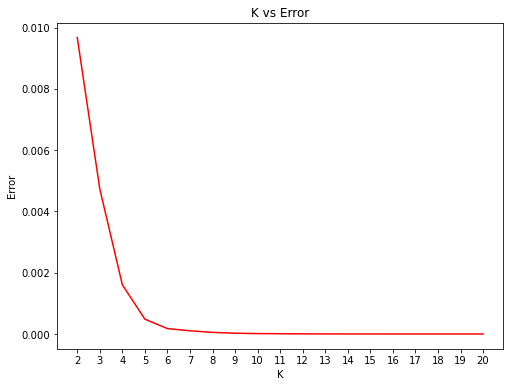

In [24]:

plt.figure(figsize=[8, 6])
sns.lineplot(x=range(2, 21), y=scores, color='r')
plt.title("K vs Error")
plt.xticks(range(2, 21))
plt.xlabel("K")
plt.ylabel("Error")


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


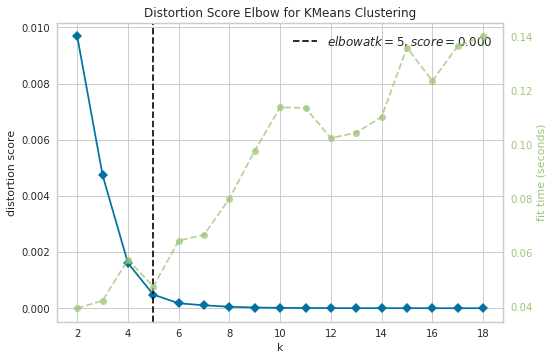

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [25]:

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,19))

visualizer.fit(ME_new)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [26]:
# from the above graphs, it is shown that the optimum value of K is 5. 

kclusters = 5

Toronto_clustered = Toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Toronto_clustered)

In [27]:
# A new dataframe that includes the cluster lables is created. 

Toronto_merged= ME_grouped.copy()
Toronto_merged["Cluster Labels"] = kmeans.labels_

Toronto_merged.head()


Neighbourhood  Middle Eastern Restaurant  \
0                                        Agincourt                   0.000000   
1                           Alderwood, Long Branch                   0.000000   
2  Bathurst Manor, Wilson Heights, Downsview North                   0.032258   
3                                  Bayview Village                   0.000000   
4                Bedford Park, Lawrence Manor East                   0.000000   

   Cluster Labels  
0               0  
1               1  
2               1  
3               0  
4               2

In [28]:
# This dataframe is again merged with the df_Toronto_Venues data frame.

Toronto_merged=Toronto_merged.join(df_Toronto_Venues.set_index("Neighbourhood"), on="Neighbourhood")

print(Toronto_merged.shape)
Toronto_merged.head()


(4893, 9)


Neighbourhood  Middle Eastern Restaurant  Cluster Labels  \
0     Agincourt                        0.0               0   
0     Agincourt                        0.0               0   
0     Agincourt                        0.0               0   
0     Agincourt                        0.0               0   
0     Agincourt                        0.0               0   

   Neighbourhood Latitude  Neighbourhood Longitude  \
0                 43.7942               -79.262029   
0                 43.7942               -79.262029   
0                 43.7942               -79.262029   
0                 43.7942               -79.262029   
0                 43.7942               -79.262029   

                         Venue  Venue Latitude  Venue Longitude  \
0                 The Roti Hut       43.787277       -79.258724   
0                  Mona's Roti       43.791613       -79.251015   
0  Panagio's Breakfast & Lunch       43.792370       -79.260203   
0     Babu Catering & Take Out       43.791721       -79.251132   
0    Bestco Food Market 鴻華超級市場       43.796514       -79.270790   

          Venue Category  
0   Caribbean Restaurant  
0   Caribbean Restaurant  
0         Breakfast Spot  
0  Sri Lankan Restaurant  
0            Supermarket

In [29]:
# sthe results are sorted by the Clsuter Lables column.

Toronto_merged.sort_values(["Cluster Labels"], inplace=True)
Toronto_merged.head()

Neighbourhood  Middle Eastern Restaurant  \
0                           Agincourt                        0.0   
34  Guildwood, Morningside, West Hill                        0.0   
34  Guildwood, Morningside, West Hill                        0.0   
34  Guildwood, Morningside, West Hill                        0.0   
34  Guildwood, Morningside, West Hill                        0.0   

    Cluster Labels  Neighbourhood Latitude  Neighbourhood Longitude  \
0                0               43.794200               -79.262029   
34               0               43.763573               -79.188711   
34               0               43.763573               -79.188711   
34               0               43.763573               -79.188711   
34               0               43.763573               -79.188711   

                       Venue  Venue Latitude  Venue Longitude  \
0               The Roti Hut       43.787277       -79.258724   
34   Mr Mike's Pizza Company       43.771454       -79.186921   
34               Kapit Bahay       43.769319       -79.184442   
34  First Choice Haircutters       43.769219       -79.184538   
34               Food Basics       43.770184       -79.184852   

          Venue Category  
0   Caribbean Restaurant  
34           Pizza Place  
34   Filipino Restaurant  
34    Salon / Barbershop  
34           Supermarket

In [30]:
Toronto_merged.shape

(4893, 9)

In [31]:
# A map is created to visualize the different clusters.


map_clusters = folium.Map(location=[latitude_toronto, longitude_toronto], zoom_start=10.3)


# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Toronto_merged['Neighbourhood Latitude'], Toronto_merged['Neighbourhood Longitude'], Toronto_merged['Neighbourhood'], Toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


### 3. Results.

In [32]:
# the df_borough data frame will be created to merge the boroughs with the Toronto_merged data frame.

df_borough = df_wiki[['Borough', 'Neighbourhood']]
df_borough.head()


Borough                                Neighbourhood
0        North York                                    Parkwoods
1        North York                             Victoria Village
2  Downtown Toronto                    Regent Park, Harbourfront
3        North York             Lawrence Manor, Lawrence Heights
4  Downtown Toronto  Queen's Park, Ontario Provincial Government

In [33]:
df_borough.shape

(103, 2)

Now, each cluster can be analyzed seperately.

In [34]:
# Cluster 1

cluster1 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 0]
df_cluster1 = pd.merge(df_borough, cluster1, on='Neighbourhood')
df_cluster1.head()

Borough   Neighbourhood  Middle Eastern Restaurant  Cluster Labels  \
0  Scarborough  Malvern, Rouge                        0.0               0   
1  Scarborough  Malvern, Rouge                        0.0               0   
2  Scarborough  Malvern, Rouge                        0.0               0   
3  Scarborough  Malvern, Rouge                        0.0               0   
4  Scarborough  Malvern, Rouge                        0.0               0   

   Neighbourhood Latitude  Neighbourhood Longitude  \
0               43.806686               -79.194353   
1               43.806686               -79.194353   
2               43.806686               -79.194353   
3               43.806686               -79.194353   
4               43.806686               -79.194353   

                         Venue  Venue Latitude  Venue Longitude  \
0                What a Bakery       43.798888       -79.196473   
1           Fusion Supermarket       43.800528       -79.200064   
2     Charley's Exotic Cuisine       43.800982       -79.200233   
3            Upper Rouge Trail       43.809988       -79.186147   
4  Rouge Park - Woodland Trail       43.801782       -79.200427   

       Venue Category  
0              Bakery  
1         Supermarket  
2  Chinese Restaurant  
3               Trail  
4               Trail

In [35]:
# finding out the number of venues in cluster 1.

df_cluster1['Venue Category'].count()


300

In [36]:
# finding out if there are any Middle Eastern restaurants in cluster 1.

if "Middle Eastern Restaurant" in df_cluster1['Venue Category'].unique():
    print(df_cluster1['Venue Category'].value_counts()['Middle Eastern Restaurant'])
else:
        print("No Middle Eastern Restaurant in Cluster 1")

1


In [37]:
# Cluster 2

cluster2 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 1]
df_cluster2 = pd.merge(df_borough, cluster2, on='Neighbourhood')
df_cluster2.head()


Borough Neighbourhood  Middle Eastern Restaurant  Cluster Labels  \
0  North York     Parkwoods                        0.0               1   
1  North York     Parkwoods                        0.0               1   
2  North York     Parkwoods                        0.0               1   
3  North York     Parkwoods                        0.0               1   
4  North York     Parkwoods                        0.0               1   

   Neighbourhood Latitude  Neighbourhood Longitude              Venue  \
0               43.753259               -79.329656      Variety Store   
1               43.753259               -79.329656        Pizza Pizza   
2               43.753259               -79.329656  DVP at York Mills   
3               43.753259               -79.329656    TTC Stop #09083   
4               43.753259               -79.329656      TTC Stop 9083   

   Venue Latitude  Venue Longitude     Venue Category  
0       43.751974       -79.333114  Food & Drink Shop  
1       43.760231       -79.325666        Pizza Place  
2       43.758899       -79.334099               Road  
3       43.759655       -79.332223           Bus Stop  
4       43.759251       -79.334000           Bus Stop

In [38]:
# finding out the number of venues in cluster 2.

df_cluster2['Venue Category'].count()

386

In [39]:
# finding out if there are any Middle Eastern restaurants in cluster 2.

if "Middle Eastern Restaurant" in df_cluster2['Venue Category'].unique():
    print(df_cluster2['Venue Category'].value_counts()['Middle Eastern Restaurant'])
else:
        print("No Middle Eastern Restaurant in Cluster 2")

1


In [40]:
# Cluster 3

cluster3 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 2]
df_cluster3 = pd.merge(df_borough, cluster3, on='Neighbourhood')
df_cluster3.head()

Borough              Neighbourhood  Middle Eastern Restaurant  \
0  Downtown Toronto  Regent Park, Harbourfront                       0.01   
1  Downtown Toronto  Regent Park, Harbourfront                       0.01   
2  Downtown Toronto  Regent Park, Harbourfront                       0.01   
3  Downtown Toronto  Regent Park, Harbourfront                       0.01   
4  Downtown Toronto  Regent Park, Harbourfront                       0.01   

   Cluster Labels  Neighbourhood Latitude  Neighbourhood Longitude  \
0               2                43.65426               -79.360636   
1               2                43.65426               -79.360636   
2               2                43.65426               -79.360636   
3               2                43.65426               -79.360636   
4               2                43.65426               -79.360636   

                        Venue  Venue Latitude  Venue Longitude  \
0  Cluny Bistro & Boulangerie       43.650565       -79.357843   
1         Body Blitz Spa East       43.654735       -79.359874   
2                     Spotify       43.649919       -79.358861   
3                   El Catrin       43.650601       -79.358920   
4                        LCBO       43.650982       -79.365361   

       Venue Category  
0   French Restaurant  
1                 Spa  
2        Tech Startup  
3  Mexican Restaurant  
4        Liquor Store

In [41]:
# finding out the number of venues in cluster 3.

df_cluster3['Venue Category'].count()

3644

In [42]:
# finding out if there are any Middle Eastern restaurants in cluster 3.

if "Middle Eastern Restaurant" in df_cluster3['Venue Category'].unique():
    print(df_cluster3['Venue Category'].value_counts()['Middle Eastern Restaurant'])
else:
        print("No Middle Eastern Restaurant in Cluster 3")

27


In [43]:
# Cluster 4

cluster4 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 3]
df_cluster4 = pd.merge(df_borough, cluster4, on='Neighbourhood')
df_cluster4.head()

Borough             Neighbourhood  Middle Eastern Restaurant  \
0  North York  York Mills, Silver Hills                        0.0   
1  North York  York Mills, Silver Hills                        0.0   
2  North York  York Mills, Silver Hills                        0.0   
3  North York  York Mills, Silver Hills                        0.0   

   Cluster Labels  Neighbourhood Latitude  Neighbourhood Longitude  \
0               3                43.75749               -79.374714   
1               3                43.75749               -79.374714   
2               3                43.75749               -79.374714   
3               3                43.75749               -79.374714   

              Venue  Venue Latitude  Venue Longitude Venue Category  
0     Swimming Pool       43.750994       -79.374365           Pool  
1       Talara Park       43.765457       -79.377301           Park  
2         Ames Park       43.751868       -79.365473           Park  
3  St. Andrews Park       43.757309       -79.386616           Park

In [44]:
# finding out the number of venues in cluster 4.

df_cluster4['Venue Category'].count()

4

In [45]:
# finding out if there are any Middle Eastern restaurants in cluster 4.

if "Middle Eastern Restaurant" in df_cluster4['Venue Category'].unique():
    print(df_cluster4['Venue Category'].value_counts()['Middle Eastern Restaurant'])
else:
        print("No Middle Eastern Restaurant in Cluster 4")

No Middle Eastern Restaurant in Cluster 4


In [46]:
# Cluster 5

cluster5 = Toronto_merged.loc[Toronto_merged['Cluster Labels'] == 4]
df_cluster5 = pd.merge(df_borough, cluster5, on='Neighbourhood')
df_cluster5.head()

Borough     Neighbourhood  Middle Eastern Restaurant  Cluster Labels  \
0  North York  Victoria Village                        0.0               4   
1  North York  Victoria Village                        0.0               4   
2  North York  Victoria Village                        0.0               4   
3  North York  Victoria Village                        0.0               4   
4  North York  Victoria Village                        0.0               4   

   Neighbourhood Latitude  Neighbourhood Longitude  \
0               43.725882               -79.315572   
1               43.725882               -79.315572   
2               43.725882               -79.315572   
3               43.725882               -79.315572   
4               43.725882               -79.315572   

                                       Venue  Venue Latitude  Venue Longitude  \
0                     Victoria Village Arena       43.723481       -79.315635   
1                                Tim Hortons       43.725517       -79.313103   
2                                  Portugril       43.725819       -79.312785   
3                                   The Frig       43.727051       -79.317418   
4  Eglinton Ave E & Sloane Ave/Bermondsey Rd       43.726086       -79.313620   

          Venue Category  
0           Hockey Arena  
1            Coffee Shop  
2  Portuguese Restaurant  
3      French Restaurant  
4           Intersection

In [47]:
# finding out the number of venues in cluster 5.

df_cluster5['Venue Category'].count()

831

In [48]:
# finding out if there are any Middle Eastern restaurants in cluster 5.

if "Middle Eastern Restaurant" in df_cluster5['Venue Category'].unique():
    print(df_cluster5['Venue Category'].value_counts()['Middle Eastern Restaurant'])
else:
        print("No Middle Eastern Restaurant in Cluster 5")

11


In [49]:
# Lets visualize these numbers for the different clusters all together.
# The first graph is visualizong the number of neighbourhoods per cluster.

# a new data frame of the ME_grouped is created by adding to it the Cluster Lables column.

ME_grouped["Cluster Labels"] = kmeans.labels_
ME_grouped.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Neighbourhood  Middle Eastern Restaurant  \
0                                        Agincourt                   0.000000   
1                           Alderwood, Long Branch                   0.000000   
2  Bathurst Manor, Wilson Heights, Downsview North                   0.032258   
3                                  Bayview Village                   0.000000   
4                Bedford Park, Lawrence Manor East                   0.000000   

   Cluster Labels  
0               0  
1               1  
2               1  
3               0  
4               2

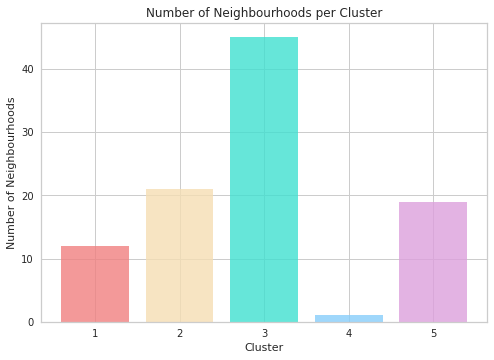

The number of neighbourhoods in each cluster are respectively:

2    45
1    21
4    19
0    12
3     1
Name: Cluster Labels, dtype: int64


In [50]:
# next, the below is used to visualize the number of neighbourhods per cluster.



bar_objects = (1,2,3,4,5)
y_pos = np.arange(len(bar_objects))
performance = ME_grouped['Cluster Labels'].value_counts().to_frame().sort_index(ascending=True)
perf = performance['Cluster Labels'].tolist()
plt.bar(y_pos, perf, align='center', alpha=0.8, color=['lightcoral', 'wheat', 'turquoise', 'lightskyblue', 'plum'])
plt.xticks(y_pos, bar_objects)
plt.ylabel('Number of Neighbourhoods')
plt.xlabel('Cluster')
plt.title('Number of Neighbourhoods per Cluster')

plt.show()

print("The number of neighbourhoods in each cluster are respectively:\n")
print(ME_grouped['Cluster Labels'].value_counts())

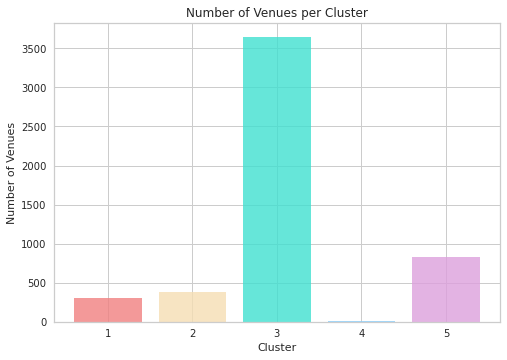

 The number of venues in each cluster are respectively: [300, 386, 3644, 4, 831]


In [51]:
# The second graph is visualizong the number of venues per cluster.

clusters_count = [df_cluster1['Venue'].count(),df_cluster2['Venue'].count(),df_cluster3['Venue'].count(),
                 df_cluster4['Venue'].count(), df_cluster5['Venue'].count()]

bar_objects1 = (1,2,3,4,5)
y_pos1 = np.arange(len(bar_objects1))
perf1 = clusters_count
plt.bar(y_pos1, perf1, align='center', alpha=0.8, color=['lightcoral', 'wheat', 'turquoise', 'lightskyblue', 'plum'])
plt.xticks(y_pos1, bar_objects1)
plt.ylabel('Number of Venues')
plt.xlabel('Cluster')
plt.title('Number of Venues per Cluster')

plt.show()


print(" The number of venues in each cluster are respectively:", clusters_count)

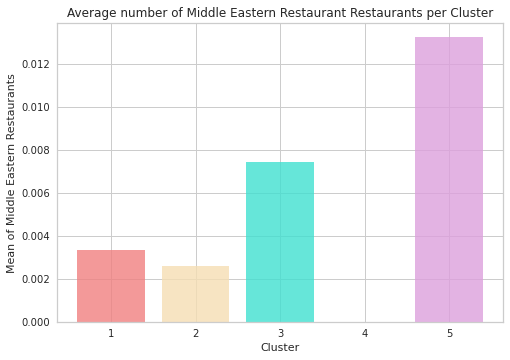

The average number of Middle eastern restaurants in each cluster are respectively: [0.0033333333333333335, 0.0025906735751295338, 0.007409440175631174, 0.0, 0.013237063778580025]


In [52]:
# The third graph is visualizong the average number of Middle Eastern Restaurants per Cluster.

clusters_mean = [df_cluster1['Middle Eastern Restaurant'].mean(),df_cluster2['Middle Eastern Restaurant'].mean(),df_cluster3['Middle Eastern Restaurant'].mean(),
                 df_cluster4['Middle Eastern Restaurant'].mean(), df_cluster5['Middle Eastern Restaurant'].mean()]
bar_objects2 = (1,2,3,4,5)
y_pos2 = np.arange(len(bar_objects2))
perf2 = clusters_mean
plt.bar(y_pos2, perf2, align='center', alpha=0.8, color=['lightcoral', 'wheat', 'turquoise', 'lightskyblue', 'plum'])
plt.xticks(y_pos2, bar_objects2)
plt.ylabel('Mean of Middle Eastern Restaurants')
plt.xlabel('Cluster')
plt.title('Average number of Middle Eastern Restaurant Restaurants per Cluster')

plt.show()

print("The average number of Middle eastern restaurants in each cluster are respectively:", clusters_mean)


### 4. Discussion.

According to the results, the number of Middle Eastern restaurants in Toronto is considerably low; thus, decreasing the level of competition. Still, the optimal option would be a place in one of the neighbourhoods that fall under cluster 3. These areas had the highest number of venues and, at the same time, only the second highest number of Middle Eastern restaurants around. This means that opening the desired restaurant in such neighbourhoods would attract large numbers of people and have little to no competition at all – in terms of similar cuisine. 


Neighbourhoods under clusters 1, 2, and 4 were not considered as a good option as the number of venues in these areas is extremely low. A new restaurant in one of these neighbourhoods would mostly attract people living nearby only. This would be optimal in the case where many Middle Eastern people live in these areas; however, this would require retrieving and analyzing further data including people demographics in Toronto. 


Neighbourhoods under cluster 5 had a substantially smaller amount of venues when compared to those under cluster 3. Also, several Middle Eastern restaurants were located in those areas, making up the highest average of such cuisine compared to the rest of the clusters. Thus, this option was eliminated as well.


In a nutshell, neighborhoods under cluster 3 provide an optimum location for opening a Middle Eastern restaurant in Toronto. Of course, considering other details, such as rental or ownership prices of venues and/or demographic data of people, would definitely improve the accuracy of this study and result in a more precise recommendation.


### 5. Conclusion.

All in all, large multicultural cities are attractive places for people to start their own business. In this study, the best neighbourhood in Toronto for opening a Middle Eastern restaurant was determined. This was done by using numerous Python libraries in order to fetch, analyze, and visualize the data. These included pandas, BeautifulSoup, seaborn, matplotlib, scikit-learn, and folium. Also,  Foursquare API was utilized to explore the settings in the neighbourhoods of Toronto. 


Determining the best place to open this restaurant was based on the average number of surrounding venues for each neighbourhood. The optimal neighbourhoods were ones having very little competition and a very high number of surrounding venues (i.e.: having a dense population).  
